In [1]:
#coding:utf-8
#导入warnings包，利用过滤器来实现忽略警告语句。
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

|  Field   | Description  |
|  ----  | ----  |
|SaleID	|交易ID，唯一编码|
|name	|汽车交易名称，已脱敏|
|regDate	|汽车注册日期，例如20160101，2016年01月01日|
|model	|车型编码，已脱敏|
|brand	|汽车品牌，已脱敏|
|bodyType	|车身类型：豪华轿车：0，微型车：1，厢型车：2，大巴车：3，敞篷车：4，双门汽车：5，商务车：6，搅拌车：7|
|fuelType	|燃油类型：汽油：0，柴油：1，液化石油气：2，天然气：3，混合动力：4，其他：5，电动：6|
|gearbox	|变速箱：手动：0，自动：1|
|power	|发动机功率：范围 [ 0, 600 ]|
|kilometer	|汽车已行驶公里，单位万km|
|notRepairedDamage	|汽车有尚未修复的损坏：是：0，否：1|
|regionCode	|地区编码，已脱敏|
|seller	|销售方：个体：0，非个体：1|
|offerType	|报价类型：提供：0，请求：1|
|creatDate	|汽车上线时间，即开始售卖时间|
|price	|二手车交易价格（预测目标）|
|v系列特征	|匿名特征，包含v0-14在内15个匿名特征|

In [2]:
df_train = pd.read_csv('./data/used_car_train_20200313.csv',sep=' ')
df_test = pd.read_csv('./data/used_car_testB_20200421.csv',sep=' ')

## 查看数据总览

In [3]:
# 50000条数据
df_train.head().append(df_test.tail())

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
0,0,736,20040402,30.0,6,1.0,0.0,0.0,60,12.5,...,0.235676,0.101988,0.129549,0.022816,0.097462,-2.881803,2.804097,-2.420821,0.795292,0.914762
1,1,2262,20030301,40.0,1,2.0,0.0,0.0,0,15.0,...,0.264777,0.121004,0.135731,0.026597,0.020582,-4.900482,2.096338,-1.030483,-1.722674,0.245522
2,2,14874,20040403,115.0,15,1.0,0.0,0.0,163,12.5,...,0.251410,0.114912,0.165147,0.062173,0.027075,-4.846749,1.803559,1.565330,-0.832687,-0.229963
3,3,71865,19960908,109.0,10,0.0,0.0,1.0,193,15.0,...,0.274293,0.110300,0.121964,0.033395,0.000000,-4.509599,1.285940,-0.501868,-2.438353,-0.478699
4,4,111080,20120103,110.0,5,1.0,0.0,0.0,68,5.0,...,0.228036,0.073205,0.091880,0.078819,0.121534,-1.896240,0.910783,0.931110,2.834518,1.923482
49995,249995,111443,20041005,4.0,4,0.0,NaN,1.0,150,15.0,...,0.263668,0.000292,0.141804,0.076393,0.039272,2.072901,-2.531869,1.716978,-1.063437,0.326587
49996,249996,152834,20130409,65.0,1,0.0,0.0,0.0,179,4.0,...,0.255310,0.000991,0.155868,0.108425,0.067841,1.358504,-3.290295,4.269809,0.140524,0.556221
49997,249997,132531,20041211,4.0,4,0.0,0.0,1.0,147,12.5,...,0.262933,0.000318,0.141872,0.071968,0.042966,2.165658,-2.417885,1.370612,-1.073133,0.270602
49998,249998,143405,20020702,40.0,1,4.0,0.0,1.0,176,15.0,...,0.282106,0.000023,0.067483,0.067526,0.009006,2.030114,-2.939244,0.569078,-1.718245,0.316379
49999,249999,78202,20090708,32.0,8,1.0,0.0,0.0,0,3.0,...,0.231449,0.103947,0.096027,0.062328,0.110180,-3.689090,2.032376,0.109157,2.202828,0.847469


In [4]:
df_train.describe()

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
count,150000.000000,150000.000000,1.500000e+05,149999.000000,150000.000000,145494.000000,141320.000000,144019.000000,150000.000000,150000.000000,...,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,74999.500000,68349.172873,2.003417e+07,47.129021,8.052733,1.792369,0.375842,0.224943,119.316547,12.597160,...,0.248204,0.044923,0.124692,0.058144,0.061996,-0.001000,0.009035,0.004813,0.000313,-0.000688
std,43301.414527,61103.875095,5.364988e+04,49.536040,7.864956,1.760640,0.548677,0.417546,177.168419,3.919576,...,0.045804,0.051743,0.201410,0.029186,0.035692,3.772386,3.286071,2.517478,1.288988,1.038685
min,0.000000,0.000000,1.991000e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,-9.168192,-5.558207,-9.639552,-4.153899,-6.546556
25%,37499.750000,11156.000000,1.999091e+07,10.000000,1.000000,0.000000,0.000000,0.000000,75.000000,12.500000,...,0.243615,0.000038,0.062474,0.035334,0.033930,-3.722303,-1.951543,-1.871846,-1.057789,-0.437034
50%,74999.500000,51638.000000,2.003091e+07,30.000000,6.000000,1.000000,0.000000,0.000000,110.000000,15.000000,...,0.257798,0.000812,0.095866,0.057014,0.058484,1.624076,-0.358053,-0.130753,-0.036245,0.141246
75%,112499.250000,118841.250000,2.007111e+07,66.000000,13.000000,3.000000,1.000000,0.000000,150.000000,15.000000,...,0.265297,0.102009,0.125243,0.079382,0.087491,2.844357,1.255022,1.776933,0.942813,0.680378
max,149999.000000,196812.000000,2.015121e+07,247.000000,39.000000,7.000000,6.000000,1.000000,19312.000000,15.000000,...,0.291838,0.151420,1.404936,0.160791,0.222787,12.357011,18.819042,13.847792,11.147669,8.658418


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 31 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   SaleID             150000 non-null  int64  
 1   name               150000 non-null  int64  
 2   regDate            150000 non-null  int64  
 3   model              149999 non-null  float64
 4   brand              150000 non-null  int64  
 5   bodyType           145494 non-null  float64
 6   fuelType           141320 non-null  float64
 7   gearbox            144019 non-null  float64
 8   power              150000 non-null  int64  
 9   kilometer          150000 non-null  float64
 10  notRepairedDamage  150000 non-null  object 
 11  regionCode         150000 non-null  int64  
 12  seller             150000 non-null  int64  
 13  offerType          150000 non-null  int64  
 14  creatDate          150000 non-null  int64  
 15  price              150000 non-null  int64  
 16  v_

In [6]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   SaleID             50000 non-null  int64  
 1   name               50000 non-null  int64  
 2   regDate            50000 non-null  int64  
 3   model              50000 non-null  float64
 4   brand              50000 non-null  int64  
 5   bodyType           48496 non-null  float64
 6   fuelType           47076 non-null  float64
 7   gearbox            48032 non-null  float64
 8   power              50000 non-null  int64  
 9   kilometer          50000 non-null  float64
 10  notRepairedDamage  50000 non-null  object 
 11  regionCode         50000 non-null  int64  
 12  seller             50000 non-null  int64  
 13  offerType          50000 non-null  int64  
 14  creatDate          50000 non-null  int64  
 15  v_0                50000 non-null  float64
 16  v_1                500

In [7]:
print(df_train.shape)
print(df_test.shape)

(150000, 31)
(50000, 30)


## 查看数据缺失情况

### 缺失量与缺失率

In [8]:
print('========train_set========')
train_count = len(df_train)
test_count = len(df_test)
for column in df_train.columns:
    miss_count = df_train[column].isnull().sum()
    miss_rate = miss_count/train_count
    if miss_rate > 0:
        print(f'【{column}】 miss_count:{miss_count},miss_rate:{round(miss_rate,5)}')
print()
print('========test_set========')
for column in df_test.columns:
    miss_count = df_test[column].isnull().sum()
    miss_rate = miss_count/test_count
    if miss_rate > 0:
        print(f'【{column}】 miss_count:{miss_count},miss_rate:{round(miss_rate,5)}')

========train_set========
【model】 miss_count:1,miss_rate:1e-05
【bodyType】 miss_count:4506,miss_rate:0.03004
【fuelType】 miss_count:8680,miss_rate:0.05787
【gearbox】 miss_count:5981,miss_rate:0.03987

========test_set========
【bodyType】 miss_count:1504,miss_rate:0.03008
【fuelType】 miss_count:2924,miss_rate:0.05848
【gearbox】 miss_count:1968,miss_rate:0.03936


In [9]:
# 缺失值主要存在于 fuelType（燃油类型）,bodyType（车身类型）,gearbox（变速箱） 

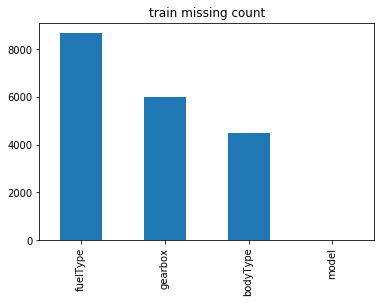

In [10]:
missing = df_train.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True, ascending=False)
missing.plot.bar()
plt.title('train missing count')
plt.show()

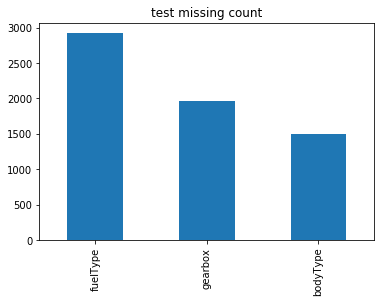

In [11]:
missing = df_test.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True, ascending=False)
missing.plot.bar()
plt.title('test missing count')
plt.show()

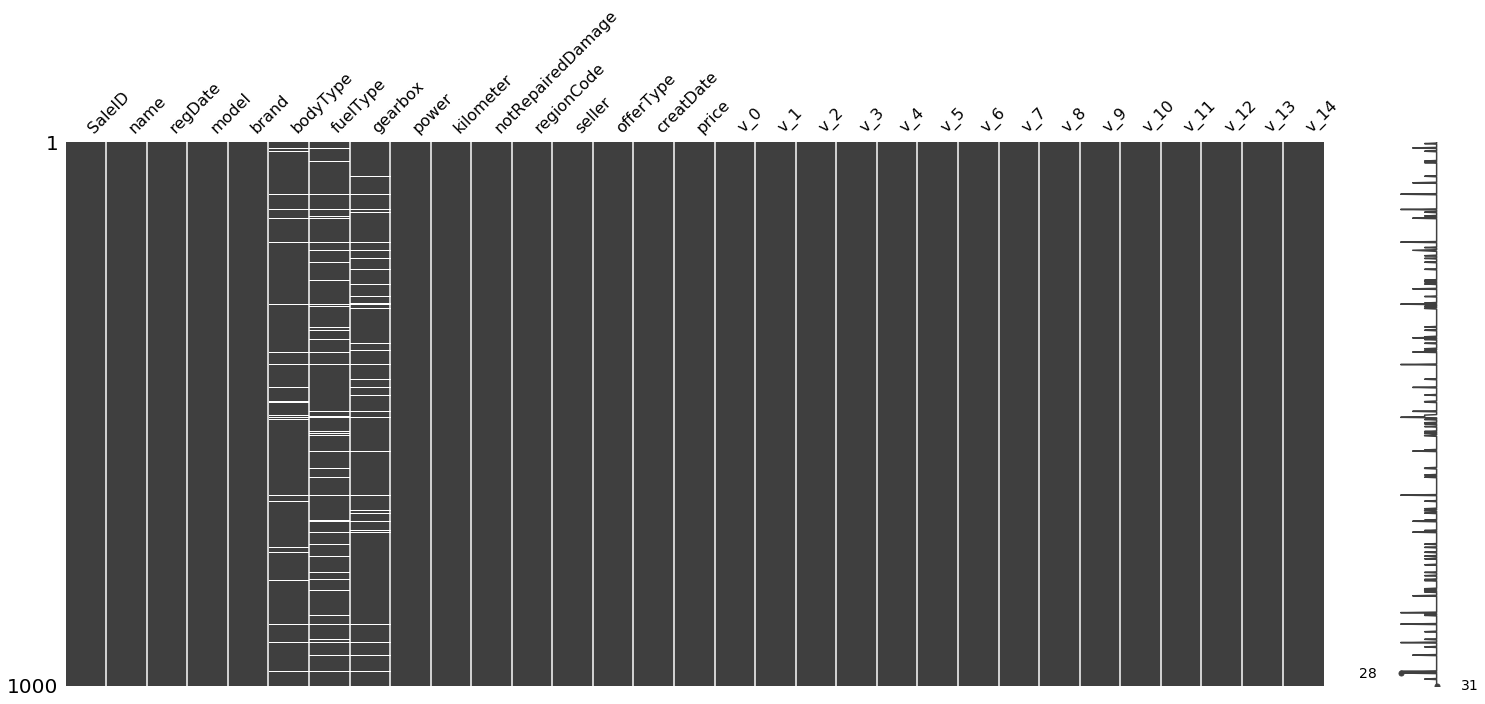

In [12]:
msno.matrix(df_train.sample(1000))

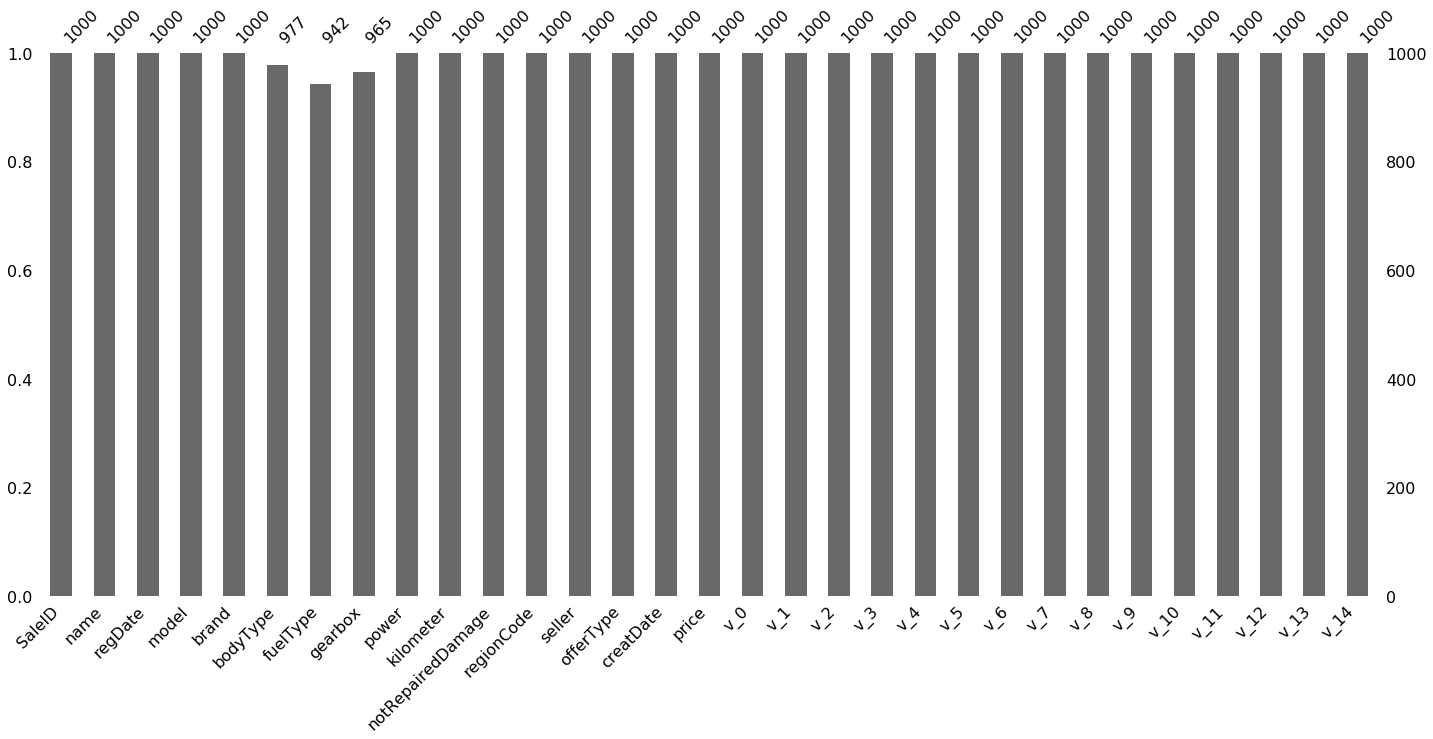

In [13]:
msno.bar(df_train.sample(1000))

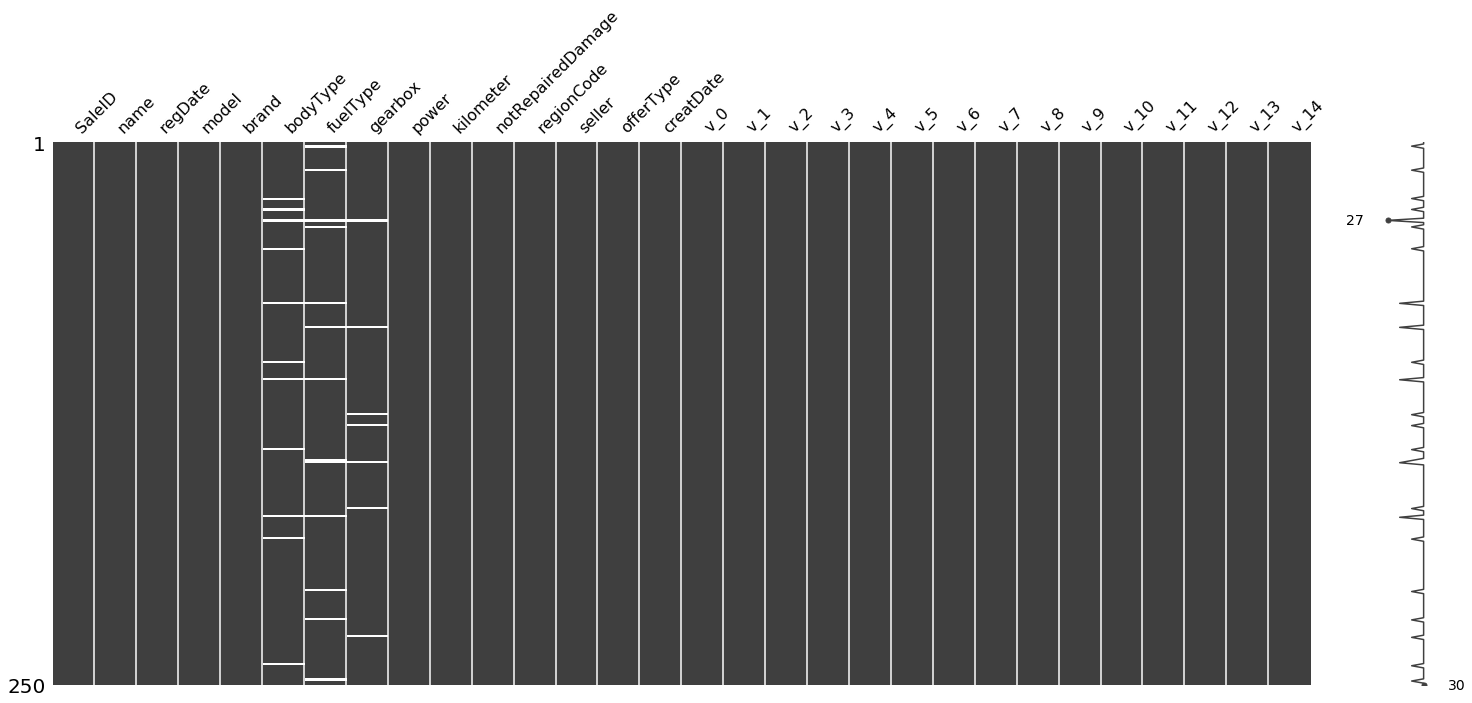

In [14]:
msno.matrix(df_test.sample(250))

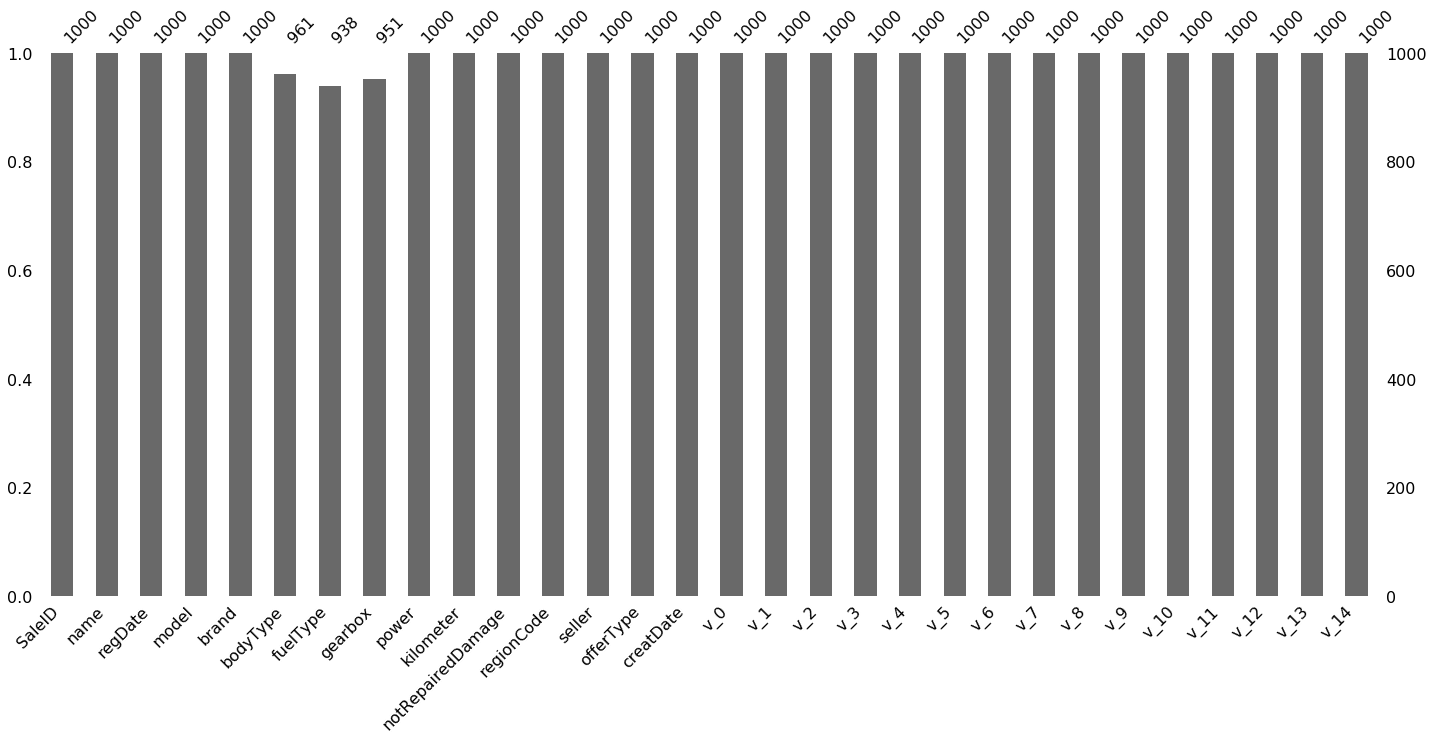

In [15]:
msno.bar(df_test.sample(1000))

### 缺失相关性

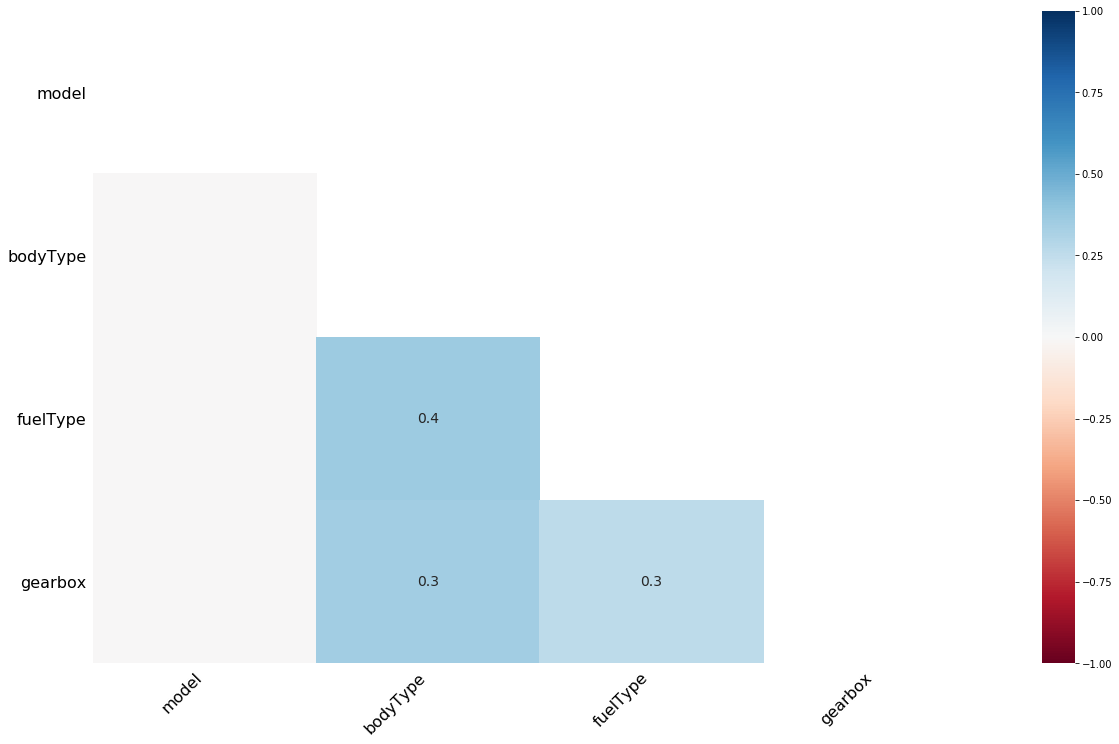

In [16]:
msno.heatmap(df_train)

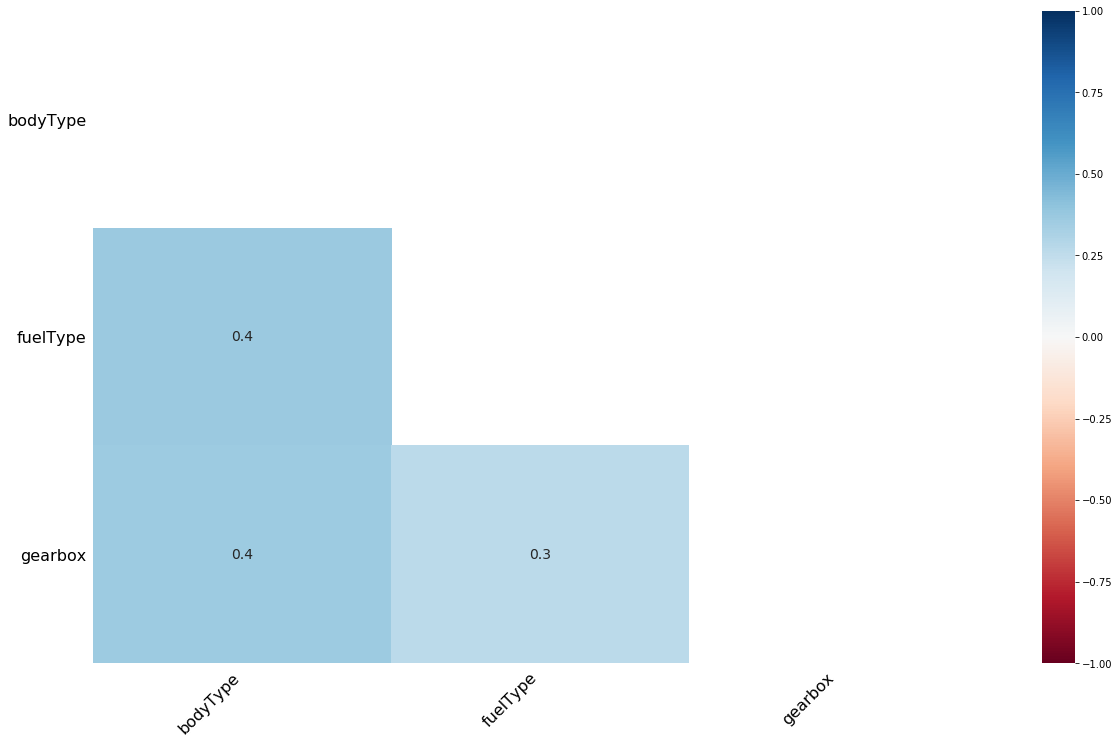

In [17]:
msno.heatmap(df_test)

## 异常数据处理

In [18]:
df_train['notRepairedDamage'].value_counts()

0.0    111361
-       24324
1.0     14315
Name: notRepairedDamage, dtype: int64

In [19]:
df_test['notRepairedDamage'].value_counts()

0.0    37224
-       8069
1.0     4707
Name: notRepairedDamage, dtype: int64

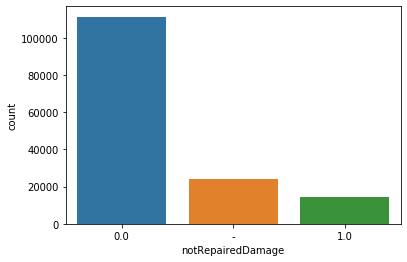

In [20]:
sns.countplot(x='notRepairedDamage', data=df_train,
              order=df_train['notRepairedDamage'].value_counts().index)

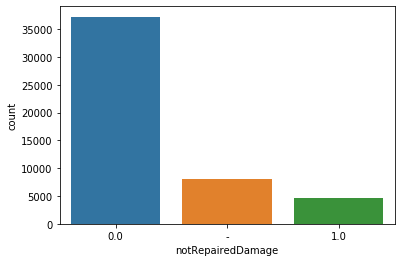

In [21]:
sns.countplot(x='notRepairedDamage',data=df_test,order=df_test['notRepairedDamage'].value_counts().index)

In [22]:
# 将-替换成空值
df_train['notRepairedDamage'].replace('-', np.nan, inplace=True)
df_test['notRepairedDamage'].replace('-', np.nan, inplace=True)

In [23]:
# 替换后再次查看缺失情况
print('========train_set========')
train_count = len(df_train)
test_count = len(df_test)
for column in df_train.columns:
    miss_count = df_train[column].isnull().sum()
    miss_rate = miss_count/train_count
    if miss_rate > 0:
        print(f'【{column}】 miss_count:{miss_count},miss_rate:{round(miss_rate,5)}')
print()
print('========test_set========')
for column in df_test.columns:
    miss_count = df_test[column].isnull().sum()
    miss_rate = miss_count/test_count
    if miss_rate > 0:
        print(f'【{column}】 miss_count:{miss_count},miss_rate:{round(miss_rate,5)}')

========train_set========
【model】 miss_count:1,miss_rate:1e-05
【bodyType】 miss_count:4506,miss_rate:0.03004
【fuelType】 miss_count:8680,miss_rate:0.05787
【gearbox】 miss_count:5981,miss_rate:0.03987
【notRepairedDamage】 miss_count:24324,miss_rate:0.16216

========test_set========
【bodyType】 miss_count:1504,miss_rate:0.03008
【fuelType】 miss_count:2924,miss_rate:0.05848
【gearbox】 miss_count:1968,miss_rate:0.03936
【notRepairedDamage】 miss_count:8069,miss_rate:0.16138


## 删除异常特征

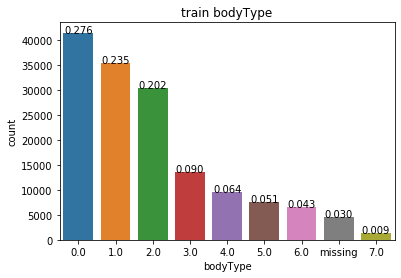

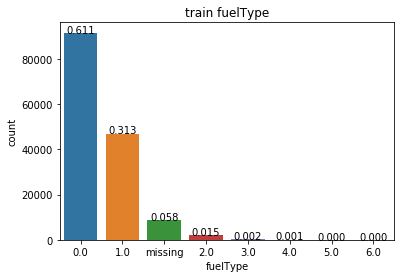

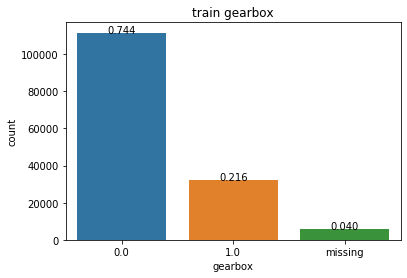

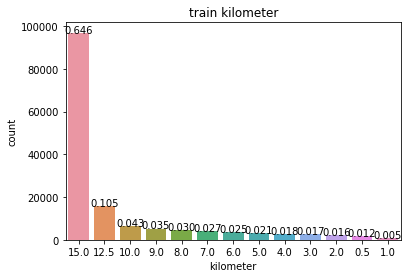

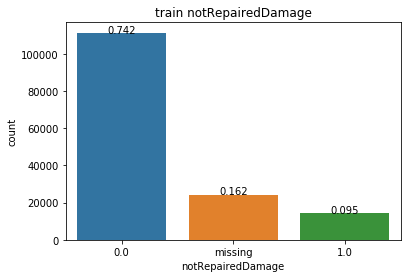

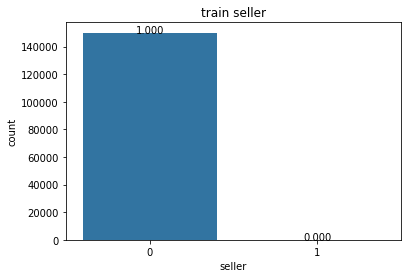

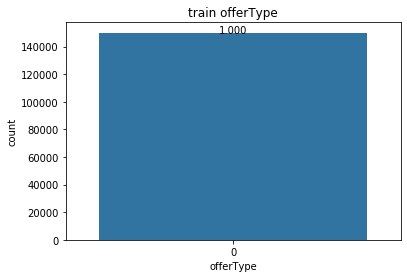

In [26]:
for column in df_train.columns:
    if df_train[column].unique().shape[0] < 20:
        tmp = df_train[[column]].copy()
        tmp.fillna('missing', inplace=True)
        ax = sns.countplot(x=column, data=tmp,
                           order=tmp[column].value_counts().index)
        for p in ax.patches:
            height = p.get_height()
            x = p.get_x()+p.get_width()/2
            y = height + 4
            percentage = '{:1.3f}'.format(height/df_train.shape[0])
            ax.text(x, y, percentage, ha="center")
        plt.title(f'train {column}')
        plt.show()

In [ ]:
for column in df_test.columns:
    if df_test[column].unique().shape[0] < 20:
        tmp = df_test[[column]].copy()
        tmp.fillna('missing', inplace=True)
        ax = sns.countplot(x=column, data=tmp,
                           order=tmp[column].value_counts().index)
        for p in ax.patches:
            height = p.get_height()
            x = p.get_x()+p.get_width()/2
            y = height + 4
            percentage = '{:1.3f}'.format(height/df_test.shape[0])
            ax.text(x, y, percentage, ha="center")
        plt.title(f'test {column}')
        plt.show()

In [ ]:
# seller字段和offerType字段数据倾斜严重或者方差为0 可以直接删除
del df_train["seller"]
del df_train["offerType"]
del df_test["seller"]
del df_test["offerType"]

## 观测预测值的分布

In [ ]:
sns.distplot(df_train['price'], bins=10)
# 偏度大于0 左偏；偏度小于0 右偏
# 峰度等于0 正态 大于0 高尖 小于0 矮胖
print("偏度: %f" % df_train['price'].skew())
print("峰度: %f" % df_train['price'].kurt())

In [ ]:
# 由于预测值是偏态分布，我们通常预测它的对数，对数后基本符合正态分布

In [ ]:
sns.distplot(np.log(df_train['price']+1))

In [ ]:
## 1) 总体分布概况（无界约翰逊分布等）
import scipy.stats as st
y = df_train['price']
plt.figure(1); plt.title('Johnson SU')
sns.distplot(y, kde=False, fit=st.johnsonsu)
plt.figure(2); plt.title('Normal')
sns.distplot(y, kde=False, fit=st.norm)
plt.figure(3); plt.title('Log Normal')
sns.distplot(y, kde=False, fit=st.lognorm)

## 特征观测

In [ ]:
# 分离label
y_train = df_train['price']

### 特征分类

In [ ]:
# 数值型变量
numeric_features = ['power', 'kilometer', 'v_0', 'v_1', 'v_2', 'v_3', 'v_4',
                    'v_5', 'v_6', 'v_7', 'v_8', 'v_9', 'v_10', 'v_11', 'v_12', 'v_13', 'v_14']

# 类别型变量
categorical_features = ['name', 'model', 'brand', 'bodyType',
                        'fuelType', 'gearbox', 'notRepairedDamage', 'regionCode']
# 日期型变量
date_features = ['regDate', 'creatDate']

### 离散型特征分析

In [ ]:
# 特征nunique分布
for cat_fea in categorical_features:
    print('===='*10)
    print("训练集【{}】特征有{}个不同的值".format(cat_fea, df_train[cat_fea].nunique()))
    print("预测集【{}】特征有{}个不同的值".format(cat_fea, df_test[cat_fea].nunique()))

In [ ]:
f, ax = plt.subplots(figsize=(16, 16))
ob_cat_feature = ['brand','bodyType', 'fuelType', 'gearbox', 'notRepairedDamage']
tmp_df = df_train.fillna('missing')
for i, cat_feature in enumerate(ob_cat_feature):
    plt.subplot(3, 2, i+1)
    sns.countplot(x=cat_feature,data=tmp_df,order=tmp_df[cat_feature].value_counts().index)
    plt.title(f'train-{cat_feature}-count')
plt.show()

In [ ]:
f, ax = plt.subplots(figsize=(16, 16))
ob_cat_feature = ['brand','bodyType', 'fuelType', 'gearbox', 'notRepairedDamage']
tmp_df = df_test.fillna('missing')
for i, cat_feature in enumerate(ob_cat_feature):
    plt.subplot(3, 2, i+1)
    sns.countplot(x=cat_feature,data=tmp_df,order=tmp_df[cat_feature].value_counts().index)
    plt.title(f'train-{cat_feature}-count')
plt.show()

In [ ]:
f, ax = plt.subplots(figsize=(16, 16))
ob_cat_feature = ['bodyType', 'fuelType', 'gearbox', 'notRepairedDamage']
tmp_df = df_train.fillna('missing')
for i, cat_feature in enumerate(ob_cat_feature):
    a = tmp_df.groupby(cat_feature)['price'].mean().reset_index()
    plt.subplot(2, 2, i+1)
    sns.barplot(x=cat_feature,y='price',data=a,order=a.sort_values('price')[cat_feature])
    plt.title(f'train-{cat_feature}-price')
plt.show()

In [ ]:
# f, ax = plt.subplots(figsize=(16, 16))
tmp_df = df_train.fillna('missing')
a = tmp_df.groupby('model')['price'].mean().reset_index()
# sns.barplot(x='model',y='price',data=a,order=a.sort_values('price')[cat_feature])
# ob_cat_feature = ['bodyType', 'fuelType', 'gearbox', 'notRepairedDamage']
# tmp_df = df_train.fillna('missing')
# for i, cat_feature in enumerate(ob_cat_feature):
#     a = tmp_df.groupby(cat_feature)['price'].mean().reset_index()
#     plt.subplot(2, 2, i+1)
#     sns.barplot(x=cat_feature,y='price',data=a,order=a.sort_values('price')[cat_feature])
#     plt.title(f'train-{cat_feature}-price')
# plt.show()
a.sort_values('price')

In [ ]:
f, ax = plt.subplots(figsize=(16, 16))
ob_cat_feature = ['bodyType', 'fuelType', 'gearbox', 'notRepairedDamage']
tmp_df = df_train.fillna('missing')
for i, cat_feature in enumerate(ob_cat_feature):
    a = tmp_df.groupby(cat_feature)['price'].median().reset_index()
    plt.subplot(2, 2, i+1)
    sns.barplot(x=cat_feature,y='price',data=a,order=a.sort_values('price')[cat_feature])
    plt.title(f'train-{cat_feature}-price')
plt.show()

### 连续型变量分析

In [ ]:
numeric_features.append('price')

In [ ]:
numeric_features

In [ ]:
f, ax = plt.subplots(figsize=(16, 16))
plt.tight_layout()
for i, feature in enumerate(numeric_features):
    plt.subplot(6, 3, i+1)
    sns.distplot(df_train[feature])
#     plt.title(f'train-{feature}')
plt.show()

In [ ]:
f, ax = plt.subplots(figsize=(16, 16))
plt.tight_layout()
for i, feature in enumerate(numeric_features):
    if feature=='price':
        continue
    plt.subplot(6, 3, i+1)
    sns.distplot(df_test[feature])
#     plt.title(f'train-{feature}')
plt.show()

In [ ]:
# df_train.head()
f, ax = plt.subplots(figsize=(7, 7))
plt.title('Correlation of Numeric Features with Price', y=1, size=16)

sns.heatmap(df_train[numeric_features].corr(method='pearson'))

In [ ]:
corr_list = []
for column in numeric_features:
    if column=='price':
        continue
    corr = round(df_train[[column,'price']].corr(method='pearson').iloc[0,1],3)
    corr_list.append((column,corr))
corr_list = sorted(corr_list,key=lambda x:x[1],reverse=True)
corr_list

In [ ]:
f=pd.melt(df_train,value_vars=numeric_features)
f

In [ ]:
# 4) 数字特征相互之间的关系可视化
sns.set()
columns = ['price', 'v_12', 'v_8', 'v_0',
           'power', 'v_5',  'v_2', 'v_6', 'v_1', 'v_14']
sns.pairplot(df_train[columns], size=2, kind='scatter', diag_kind='kde')
plt.show()

In [ ]:
tmp = df_train[numeric_features].corr()
tmp[(tmp > 0.9) | (tmp < -0.9)]

In [ ]:
sns.heatmap(tmp[(tmp>0.9)|(tmp<-0.9)].fillna(0))

### 日期特征分析

In [ ]:
print(f'训练集最早注册时间:{df_train.regDate.min()},最晚注册时间:{df_train.regDate.max()}')
print(f'训练集最早上线时间:{df_train.creatDate.min()},最晚上线时间:{df_train.creatDate.max()}')
print('='*20)
print(f'测试集最早注册时间:{df_test.regDate.min()},最晚注册时间:{df_test.regDate.max()}')
print(f'测试集最早上线时间:{df_test.creatDate.min()},最晚上线时间:{df_test.creatDate.max()}')

In [ ]:
df_train[['regDate','creatDate']]
# 处理月份为0的情况
def clean_error_month(x):
    x = str(x)
    if len(x)!=8:
        return pd.NaT
    if x[4:6]=='00':
        x = x[:4]+'01'+x[6:]
    return x

df_train['regDate'] = df_train['regDate'].apply(clean_error_month)
df_test['regDate'] = df_test['regDate'].apply(clean_error_month)

In [ ]:
df_train['used_days'] = (pd.to_datetime(df_train['creatDate'], format='%Y%m%d') -
                         pd.to_datetime(df_train['regDate'], format='%Y%m%d')).dt.days
df_test['used_days'] = (pd.to_datetime(df_test['creatDate'], format='%Y%m%d') -
                        pd.to_datetime(df_test['regDate'], format='%Y%m%d')).dt.days

In [ ]:
sns.distplot(df_train['used_days'],bins=10)

In [ ]:
sns.jointplot(x='used_days', y='price', data=df_train)

In [ ]:
df_train['year'] = pd.to_datetime(df_train['creatDate'], format='%Y%m%d').dt.year
df_train['month'] = pd.to_datetime(df_train['creatDate'], format='%Y%m%d').dt.month
df_train['quarter'] = pd.to_datetime(df_train['creatDate'], format='%Y%m%d').dt.quarter

In [ ]:
df_train.year.value_counts()

In [ ]:
sns.countplot(df_train.year)

In [ ]:
print(df_train.month.value_counts())
sns.countplot(df_train.month)

In [ ]:
df_train.head()

In [ ]:
df_test[df_test['name']==736]